In [48]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

from tqdm import tqdm as tqdm

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

### Figure 1

In [2]:
# No code necessary. Created on BioRender.com.

### Figure 2


In [75]:
# Figure 2A was created using BioRender.com.

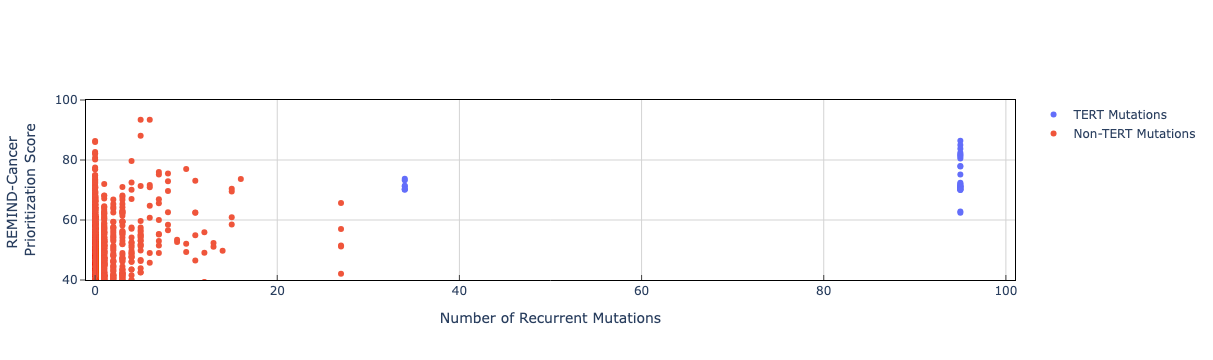

In [147]:
# Figure 2B
recurrence_and_scores_table = pd.read_csv("./data/recurrence_and_score_table.csv")

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = recurrence_and_scores_table[recurrence_and_scores_table["is_tert"] == True]["total_num_recurrent_mutations"],
        y = recurrence_and_scores_table[recurrence_and_scores_table["is_tert"] == True]["score"],
        mode = "markers",
        name = "TERT Mutations"
    )
)

fig.add_trace(
    go.Scatter(
        x = recurrence_and_scores_table[recurrence_and_scores_table["is_tert"] == False]["total_num_recurrent_mutations"],
        y = recurrence_and_scores_table[recurrence_and_scores_table["is_tert"] == False]["score"],
        mode = "markers",
        name = "Non-TERT Mutations"
    )
)

fig.update_layout(
    yaxis_range = [40, 100],
    xaxis_range = [-1, 101],
    xaxis_title = "Number of Recurrent Mutations",
    yaxis_title = "REMIND-Cancer <br>Prioritization Score"
)

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    mirror=True,
    ticks='inside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    linewidth=1
)

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    linewidth=1
)
    
fig.show()

In [128]:
top1000 = pd.read_excel("./data/final_methods_supplementary_tables.xlsx", sheet_name=5)

In [129]:
top100 = top1000.iloc[:100]
top100

,score,pid,cohort,#CHROM,POS,REF,ALT,SEQUENCE_CONTEXT,GENE,purity,...,remaining_tfs,num_created_tfs_passing_tf_expression_threshold,num_destroyed_tfs_passing_tf_expression_threshold,num_remaining_tfs,within_cgc_list,open_chromatin,num_original_mutations,num_promoter_mutations,num_final_mutations,total_num_recurrent_mutations
0,93.449930,45a7949d-e63f-4956-866c-df51257032de,BLCA-US,2,71204529,G,A,"GGGAAAGGGA,ACTCCCTTTC",ANKRD53,0.938,...,"NFKB1,NFKB2",4,0,2,False,True,10803,280,48,5
1,93.409326,6c884037-49f9-41c3-b0e5-9cbcd545aeb7,SKCM-US,9,91933357,G,A,"CCGGCCGGAA,AAAGGGCGGG",SECISBP2,0.780,...,"ELK1,ELK3",0,2,2,False,True,39153,825,83,6
2,88.101923,49dec0c2-8e75-4f44-a253-82b2ea605890,LUAD-US,2,71204529,G,A,"GGGAAAGGGA,ACTCCCTTTC",ANKRD53,0.500,...,"NFKB1,NFKB2",4,0,2,False,True,21572,425,39,5
3,86.446376,d692ecd0-2433-426b-9af2-a30c44a80f7c,THCA-US,5,1295228,G,A,"AGGGCCCGGA,GGGGCTGGGC",TERT,0.589,...,"KLF16,TFAP2A,TFAP2A,TFAP2B,TFAP2C,ZBTB7A,ELF1,...",2,6,9,True,False,1003,18,3,95
4,86.302525,9988eb07-01f6-4f83-8699-bb63e0525f08,HNSC-US,7,145813786,C,A,"GCTGAGACTC,CCTGCCGCTC",CNTNAP2,0.489,...,SNAI3,8,1,1,True,True,22489,437,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,69.000000,22edd867-dcd6-42b5-92bb-025ceb84b106,SKCM-US,6,54711199,C,T,"CGCCTTCTTC,CAGGTGAGCG",FAM83B,0.470,...,EBF1,0,2,1,False,True,26097,473,51,0
96,69.000000,04aa6b77-8074-480c-872e-a1a47afa5314,SKCM-US,20,55904848,G,A,"GAAAGCGCGG,AAAGGCACGC",SPO11,0.517,...,NaN,0,2,0,False,True,334991,5950,587,0
97,69.000000,760881cc-c623-11e3-bf01-24c6515278c0,LIRI-JP,6,150389763,G,A,"CCCATGTCTT,ACCCCAGCTC",ULBP3,0.858,...,NR2C2,0,2,1,False,True,112078,2281,203,0
98,68.963549,faff4626-615b-416a-b7a6-9d177dcc94a9,READ-US,8,31497371,A,G,"CCCCCAATAA,TAAATAAAAG",NRG1,0.689,...,"FOXB1,FOXC1,FOXC2,FOXD2,HNF1A,HOXB13,ONECUT1,O...",1,1,10,True,True,10111,178,19,0


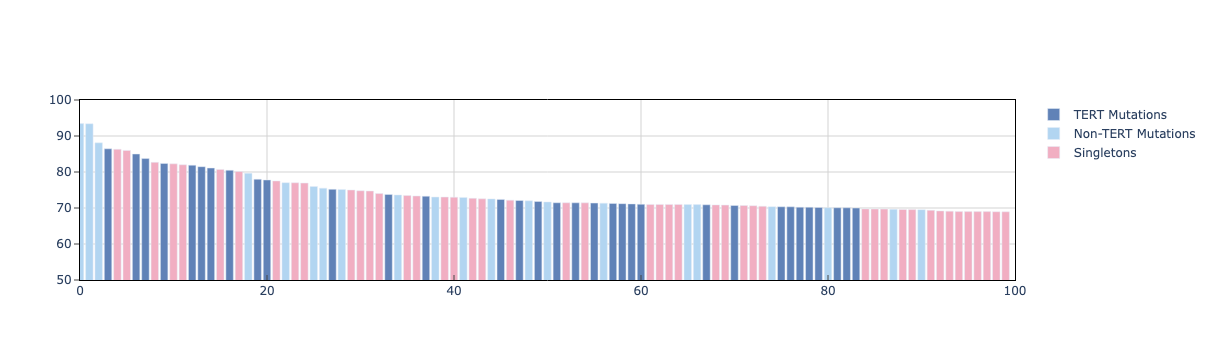

In [158]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = top100[top100["GENE"] == "TERT"].index,
        y = top100[top100["GENE"] == "TERT"]["score"],
        name = "TERT Mutations",
        marker_color = "#6082b7"
    )
)

fig.add_trace(
    go.Bar(
        x = top100[(top100["GENE"] != "TERT") & (top100["total_num_recurrent_mutations"] > 0)].index,
        y = top100[(top100["GENE"] != "TERT") & (top100["total_num_recurrent_mutations"] > 0)]["score"],
        name = "Non-TERT Mutations",
        marker_color = "#b2d5f1"
    )
)
fig.add_trace(
    go.Bar(
        x = top100[(top100["total_num_recurrent_mutations"] == 0)].index,
        y = top100[(top100["total_num_recurrent_mutations"] == 0)]["score"],
        name = "Singletons",
        marker_color = "#f1aec2"
    )
)

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    mirror=True,
    ticks='inside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    linewidth=1
)

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    linewidth=1
)
    


fig.update_layout(
    yaxis_range = [50, 100],
    xaxis_range = [0, 100]
)

### Figure 3
Sample of interest: "54a77010-2f16-4da9-8ca0-746a51801a00"

In [59]:
skcm_us_fpkm = pd.read_csv("./data/skcm_us_fpkm.csv")
skcm_us_fpkm.set_index("Patient_ID", inplace=True)

In [60]:
skcm_us_fpkm.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC099676.1,AL391069.4,AL354760.1,OR6R2P,AL139339.2,AC096992.2,AC104836.1,AC008264.2,AP000229.1,AC098479.1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
41a7b031-d928-4a1f-891b-82fb3f6d548f,9.165695,0.043181,25.452836,1.870490,4.356859,0.446267,0.651338,29.333235,8.868660,26.192349,...,0.338613,0.216803,0.151369,0.000000,0.063490,0.586227,0.005377,0.029814,0.000000,0.270863
fe8c62a6-c113-46e8-ab91-fdb90bb6a59f,9.325312,0.149001,25.713349,2.655871,3.366440,1.142260,1.536636,23.468102,6.547917,31.869656,...,0.912831,0.041561,0.217631,0.033318,0.060855,0.830979,0.015461,0.042865,0.039121,0.389435
affa4ef4-02ec-40f1-b6a2-739f8bf2afa9,23.496141,0.010078,17.784702,3.086497,2.575270,0.756622,31.760362,30.866657,1.840522,15.808113,...,0.666795,0.168663,0.693930,0.000000,0.012348,0.775618,0.075292,0.104371,0.023814,0.474117
d056645f-4dd3-49f3-b0a4-2293e2b4d82c,9.488670,0.000000,14.466627,1.524463,1.572170,0.220588,1.030022,18.918524,4.774886,21.939470,...,0.458228,0.056900,0.085128,0.000000,0.000000,0.438809,0.074084,0.000000,0.013390,0.177719
22edd867-dcd6-42b5-92bb-025ceb84b106,11.896131,0.000000,38.450823,4.029386,3.804210,8.096825,3.123636,27.532646,2.118178,11.168947,...,0.913442,0.069315,0.311110,0.000000,0.084578,0.613753,0.034381,0.038723,0.010874,0.144332


In [62]:
skcm_us_zscore_dataframe = zscore(skcm_us_fpkm, axis=0)
skcm_us_zscore_dataframe.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC099676.1,AL391069.4,AL354760.1,OR6R2P,AL139339.2,AC096992.2,AC104836.1,AC008264.2,AP000229.1,AC098479.1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
41a7b031-d928-4a1f-891b-82fb3f6d548f,-0.616566,-0.160174,-0.102196,-0.655151,2.402502,-0.960685,-0.634873,-0.099984,1.776795,0.592579,...,-0.626517,3.440278,-0.806529,-0.369732,0.092746,-0.321930,-0.681879,-0.064549,-0.277357,-0.038446
fe8c62a6-c113-46e8-ab91-fdb90bb6a59f,-0.603488,-0.104566,-0.074833,0.304953,1.331883,-0.644332,-0.569961,-0.459094,0.848429,1.102465,...,0.777877,0.040096,-0.589575,1.515403,0.045979,0.315596,-0.560290,0.182835,-0.213340,0.398805
affa4ef4-02ec-40f1-b6a2-739f8bf2afa9,0.557617,-0.177570,-0.907615,0.831380,0.476648,-0.819618,1.646130,-0.006096,-1.034670,-0.340042,...,0.176135,2.506217,0.969906,-0.369732,-0.815071,0.171392,0.161110,1.348696,-0.238388,0.711084
d056645f-4dd3-49f3-b0a4-2293e2b4d82c,-0.590103,-0.182866,-1.256127,-1.078158,-0.607678,-1.063264,-0.607107,-0.737654,0.139163,0.210623,...,-0.333970,0.337700,-1.023413,-0.369732,-1.034260,-0.705920,0.146547,-0.629669,-0.255446,-0.381931
22edd867-dcd6-42b5-92bb-025ceb84b106,-0.392845,-0.182866,1.263041,1.984032,1.805102,2.516759,-0.453597,-0.210230,-0.923599,-0.756691,...,0.779371,0.578599,-0.283511,-0.369732,0.467076,-0.250232,-0.332169,0.104332,-0.259563,-0.505050


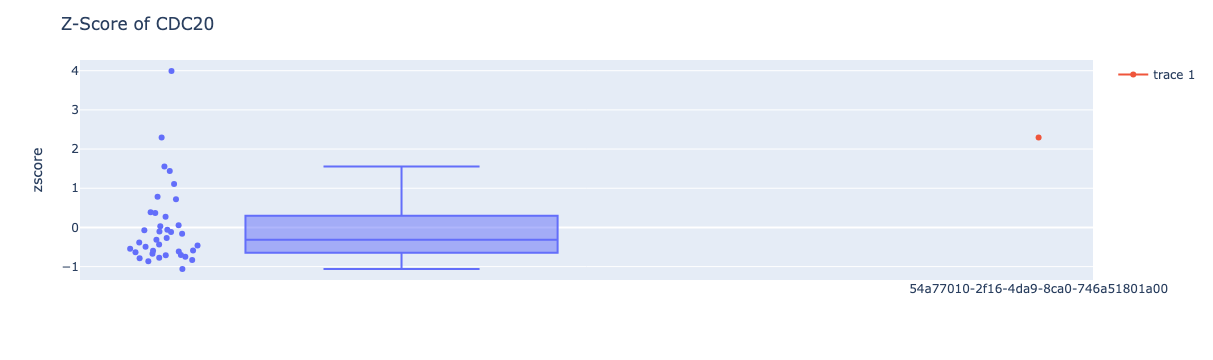

In [72]:
fig = px.box(skcm_us_zscore_dataframe, y="CDC20", points="all")
fig.update_layout(
    title = "Z-Score of CDC20",
    yaxis_title = "zscore",
)

fig.add_trace(
    go.Scatter(
        y = [skcm_us_zscore_dataframe.loc["54a77010-2f16-4da9-8ca0-746a51801a00", "CDC20"]],
        x = ["54a77010-2f16-4da9-8ca0-746a51801a00"]
    )
)

fig.show()

In [74]:
# Figures 3C-3F were generated from pSNV Hunter: https://github.com/nicholas-abad/pSNV-hunter